In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

                 name  featureAmount  depth  instanceAmount  attackPower  \
0     heart-cleveland             10      1             100        0.005   
1         hypothyroid             10      1             100        0.005   
2         tic-tac-toe             10      1             100        0.005   
3                vote             10      1             100        0.005   
4               lymph             10      1             100        0.005   
...               ...            ...    ...             ...          ...   
6744          segment            100      2             800        0.050   
6745         mushroom            100      1            1000        0.050   
6746          segment            100      1            1000        0.050   
6747         mushroom            100      2            1000        0.050   
6748          segment            100      2            1000        0.050   

       runtime  attack_instance  
0     0.031003              0.5  
1     0.077022     

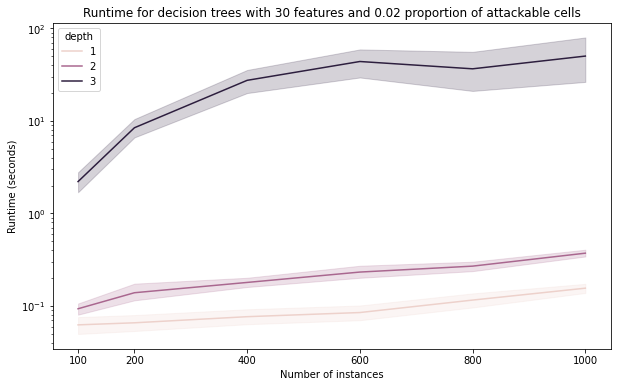

In [12]:


# Load the CSV data into a DataFrame
# df = pd.read_csv('data.csv')
# df = df[df['runtime'] > -4]

# Create a new column for 'attackPower' multiplied by 'instanceAmount'
savedf = df
df['attack_instance'] = df['attackPower'] * df['instanceAmount']

# Split the DataFrame into two subsets: one where 'depth' == 3, and the rest
# df_depth_3 = df[df['depth'] == 3]
# df_other_depths = df[df['depth'] != 3]

# Function to drop all rows after the first negative 'runtime' is encountered
def drop_after_first_negative(group):
    if any(group['runtime'] < 0):
        return None  # Return an empty DataFrame
    else:
        return group


# Apply the function to each group of rows with the same 'featureAmount' in the depth 3 DataFrame
df = df.groupby(['featureAmount', 'attackPower', 'instanceAmount', 'depth']).apply(drop_after_first_negative).reset_index(drop=True)
print(df)

df = df.dropna().reset_index(level=0,drop=True)
print(df)

# Concatenate the two subsets back together
# df = pd.concat([df_depth_3, df_other_depths], ignore_index=True)

# Create 5 plots for each depth amount
# df = df[df['instanceAmount'] == 600]
i = 4
# df_depth = df[df['depth'] == i]
# df = df[df['attackPower'] == 0.02]
df = df[df['depth'] < i]
# dff = df[df['featureAmount'] == 80]
# print( dff[dff['attackPower'] == 0.01])

df = df[df['featureAmount'] == 30]
plt.figure(figsize=(10, 6))
sns.lineplot(x='instanceAmount', y='runtime', hue='depth', data=df)
plt.yscale("log")
plt.xlabel('Number of instances')
# attackPowerTicks = [0.005, 0.01]
plt.xticks([100, 200, 400, 600, 800, 1000])
plt.ylabel('Runtime (seconds)')
plt.title(f'Runtime for decision trees with 30 features and 0.02 proportion of attackable cells')
plt.show()




1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
done


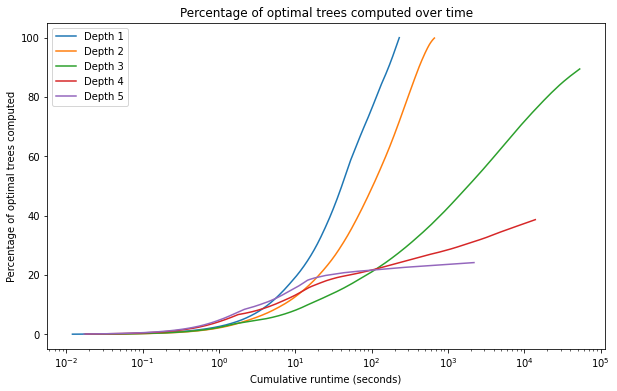

In [49]:
# # # Load the CSV data into a DataFrame
df = pd.read_csv('datawithanswers.csv')
# df = df[df['runtime'] > -2]
# # # Create a new column for 'attackPower' multiplied by 'instanceAmount'
df['attack_instance'] = df['attackPower'] * df['instanceAmount']
# Step 1: Filter the DataFrame where 'runtime' is -5.
df_neg5 = df[df['runtime'] == -5].copy()

# Step 2: Apply function to each row of original DataFrame.
c = 0
def update_runtime(row):
    global c
    c += 1
    if(c%1000 == 0):
        print(c)
    name = row['name']
    featureAmount = row['featureAmount']
    instanceAmount = row['instanceAmount']
    
    if(row['runtime'] == -1 or row['runtime'] == -2):
        
        compare = df_neg5[(df_neg5['name'] == name) & 
                    ((df_neg5['featureAmount'] < featureAmount) | 
                    (df_neg5['instanceAmount'] < instanceAmount))]
        if(compare.empty):
            return row['runtime']
        return compare['runtime'].iloc[0]
    return row['runtime']

df['runtime'] = df.apply(update_runtime, axis=1)
print("done")
df = df[df['runtime'] > -4]



def get_other_runtime(row):
    global c
    c += 1
    print('hello')
    if(c%1000 == 0):
        print(c)
    name = row['name']
    featureAmount = row['featureAmount']
    instanceAmount = row['instanceAmount']
    attackPower = row['attackPower']
    depth = row['depth']
    print("ok")
    compare = df[(df['name'] == name) & 
                (df['featureAmount'] == featureAmount) & 
                (df['instanceAmount'] == instanceAmount) & 
                (df['attackPower'] == attackPower) & 
                (df['depth'] == depth)]
    print('I see')
    print(compare['runtime'].loc[0])
    return compare['runtime'].loc[0]
    
dfbrute = pd.read_csv('bruteforcedata.csv')
dfbrute = dfbrute[dfbrute['runtime'] > -1.5]


# df = dfbrute
df1 = df[df['depth'] == 1]
total_rows1 = len(df1)
# Filter out non-positive runtimes
df1 = df1[df1['runtime'] > 0]
df1 = df1.sort_values('runtime').reset_index(drop=True)
# Calculate the cumulative sum of runtime
df1['cumulative_runtime'] = df1['runtime'].cumsum()
# Calculate the percentage of rows completed up to each point in time
df1['percentage_complete'] = (df1.index + 1) / total_rows1 * 100


df2 = df[df['depth'] == 2]
total_rows2 = len(df2)
# Filter out non-positive runtimes
df2 = df2[df2['runtime'] > 0]

# Sort by runtime
df2 = df2.sort_values('runtime').reset_index(drop=True)
# Calculate the cumulative sum of runtime
df2['cumulative_runtime'] = df2['runtime'].cumsum()
# Calculate the percentage of rows completed up to each point in time
df2['percentage_complete'] = (df2.index + 1) / total_rows2 * 100

df3 = df[df['depth'] == 3]
total_rows3 = len(df3)
# Filter out non-positive runtimes
df3 = df3[df3['runtime'] > 0]
df3 = df3.sort_values('runtime').reset_index(drop=True)
# Calculate the cumulative sum of runtime
df3['cumulative_runtime'] = df3['runtime'].cumsum()
# Calculate the percentage of rows completed up to each point in time
df3['percentage_complete'] = (df3.index + 1) / total_rows3 * 100

df4 = df[df['depth'] == 4]
total_rows4 = len(df4)
# Filter out non-positive runtimes
df4 = df4[df4['runtime'] > 0]
df4 = df4.sort_values('runtime').reset_index(drop=True)
# Calculate the cumulative sum of runtime
df4['cumulative_runtime'] = df4['runtime'].cumsum()
# Calculate the percentage of rows completed up to each point in time
df4['percentage_complete'] = (df4.index + 1) / total_rows4 * 100

df5 = df[df['depth'] == 5]
total_rows5 = len(df5)
# Filter out non-positive runtimes
df5 = df5[df5['runtime'] > 0]
df5 = df5.sort_values('runtime').reset_index(drop=True)
# Calculate the cumulative sum of runtime
df5['cumulative_runtime'] = df5['runtime'].cumsum()
# Calculate the percentage of rows completed up to each point in time
df5['percentage_complete'] = (df5.index + 1) / total_rows5 * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='cumulative_runtime', y='percentage_complete', data=df1, errorbar=None)
sns.lineplot(x='cumulative_runtime', y='percentage_complete', data=df2, errorbar=None)
sns.lineplot(x='cumulative_runtime', y='percentage_complete', data=df3, errorbar=None)

sns.lineplot(x='cumulative_runtime', y='percentage_complete', data=df4, errorbar=None)
sns.lineplot(x='cumulative_runtime', y='percentage_complete', data=df5, errorbar=None)
# plt.yticks(np.arange(0, 111, 10))
plt.xscale("log")
plt.xlabel('Cumulative runtime (seconds)')
plt.ylabel('Percentage of optimal trees computed')
plt.legend(['Depth 1','Depth 2','Depth 3','Depth 4', 'Depth 5'])
plt.title('Percentage of optimal trees computed over time')
plt.show()


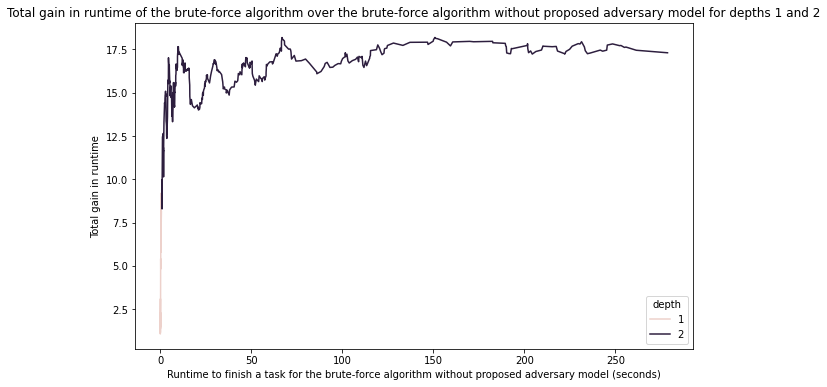

In [57]:
df = pd.read_csv('bruteforcedata.csv')
c = 0
def get_other_runtime(row):
    global c
    c += 1
    if(c%1000 == 0):
        print(c)
    name = row['name']
    featureAmount = row['featureAmount']
    instanceAmount = row['instanceAmount']
    attackPower = row['attackPower']
    depth = row['depth']

    compare = df[(df['name'] == name) & 
                (df['featureAmount'] == featureAmount) & 
                (df['instanceAmount'] == instanceAmount) & 
                (df['attackPower'] == attackPower) & 
                (df['depth'] == depth)]
    return compare['runtime'].iloc[0]
    
dfbrute = pd.read_csv('bruteforcedataWithScore.csv')
dfbrute = dfbrute[dfbrute['runtime'] > -1]

dfbrute['other_runtime'] = dfbrute.apply(get_other_runtime, axis=1)
dfbrute = dfbrute.sort_values(by=['depth', 'runtime'])


dfbrute['ratio'] = dfbrute['runtime'] / dfbrute['other_runtime']

dfbrute['ratio_smooth'] = dfbrute.groupby('depth')['ratio'].rolling(window=15, center=True, min_periods = 1).mean().reset_index(0, drop=True)


dfbrute.sort_values('runtime').reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.lineplot(x='runtime', y='ratio_smooth', data=dfbrute, hue = 'depth')
plt.xlabel('Runtime to finish a task for the brute-force algorithm without proposed adversary model (seconds)')
plt.ylabel('Total gain in runtime')

plt.title('Total gain in runtime of the brute-force algorithm over the brute-force algorithm without proposed adversary model for depths 1 and 2')
plt.show()




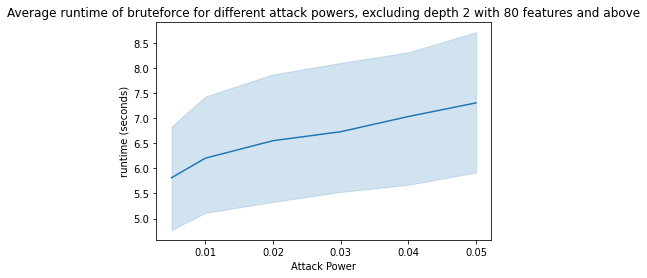

In [55]:
df = pd.read_csv('bruteforcedata.csv')
df = df[df['runtime'] > -1]
df = df[(df['depth']  < 2) | ((df['depth'] == 2) & (df['featureAmount'] < 80))]
df['runtime'] = df['runtime'].replace(1000, -1)
df = df[df['runtime'] > -1]

sns.lineplot(x='attackPower', y='runtime', data=df)

plt.xlabel('Attack Power')
plt.ylabel('runtime (seconds)')
plt.title('Average runtime of bruteforce for different attack powers, excluding depth 2 with 80 features and above')
plt.show()

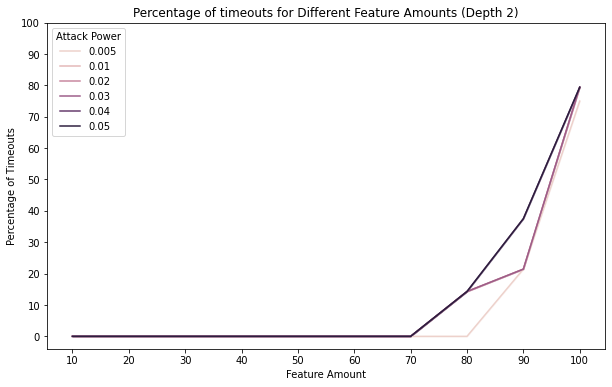

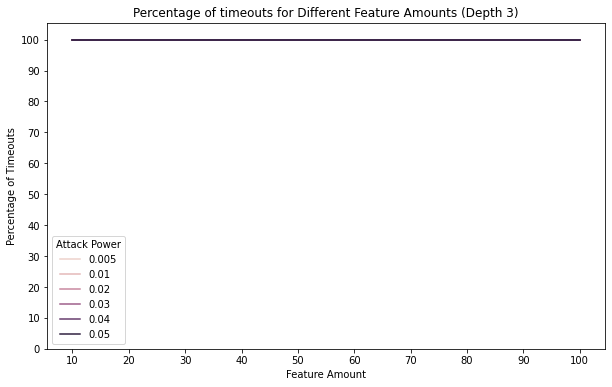

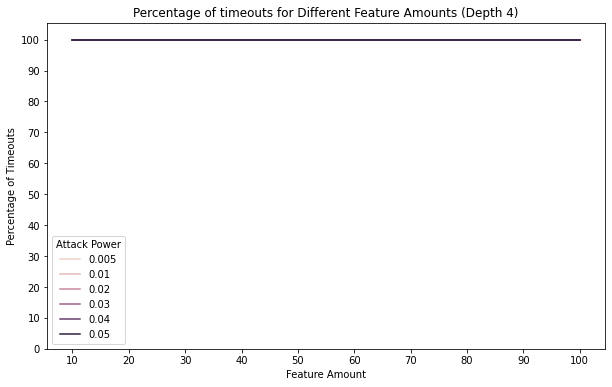

In [28]:
# Filtering DataFrame for depth 1, 2, and 3.
df = pd.read_csv('bruteforcedata.csv')
df = df[df['runtime'] > -1.5]

df3 = df[df['depth'] == 2].copy()
df4 = df[df['depth'] == 3].copy()
df5 = df[df['depth'] == 4].copy()

# Compute the 'non_neg_runtime_pct' for each DataFrame.
for temp_df in [df3, df4, df5]:
    temp_df.loc[:, 'percentage_of_timeouts'] = temp_df.groupby(['featureAmount', 'attackPower'])['runtime'].transform(lambda x: (x < 0).sum() / len(x) * 100)

# Now you can proceed to plot as before.

plt.figure(figsize=(10, 6))

# 'attackPower' is added to the hue parameter to create separate lines for each 'attackPower'.
sns.lineplot(x='featureAmount', y='percentage_of_timeouts', data=df3, hue='attackPower')

plt.xlabel('Feature Amount')
plt.ylabel('Percentage of Timeouts')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(np.arange(10, 101, 10))

plt.legend(title='Attack Power')
plt.title('Percentage of timeouts for Different Feature Amounts (Depth 2)')
plt.show()

plt.figure(figsize=(10, 6))

# 'attackPower' is added to the hue parameter to create separate lines for each 'attackPower'.
sns.lineplot(x='featureAmount', y='percentage_of_timeouts', data=df4, hue='attackPower')

plt.xlabel('Feature Amount')
plt.ylabel('Percentage of Timeouts')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(np.arange(10, 101, 10))

plt.legend(title='Attack Power')
plt.title('Percentage of timeouts for Different Feature Amounts (Depth 3)')
plt.show()

plt.figure(figsize=(10, 6))

# 'attackPower' is added to the hue parameter to create separate lines for each 'attackPower'.
sns.lineplot(x='featureAmount', y='percentage_of_timeouts', data=df5, hue='attackPower')

plt.xlabel('Feature Amount')
plt.ylabel('Percentage of Timeouts')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(np.arange(10, 101, 10))
plt.legend(title='Attack Power')
plt.title('Percentage of timeouts for Different Feature Amounts (Depth 4)')
plt.show()